![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

The task is to analyze crime data to identify patterns in criminal behavior. The insights can be used to allocate resources effectively to tackle various crimes in different areas.

## The Data

A summary and preview of the dataset are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [53]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


# Which hour has the highest frequency of crimes?

The hour with the highest frequency of crimes is 12


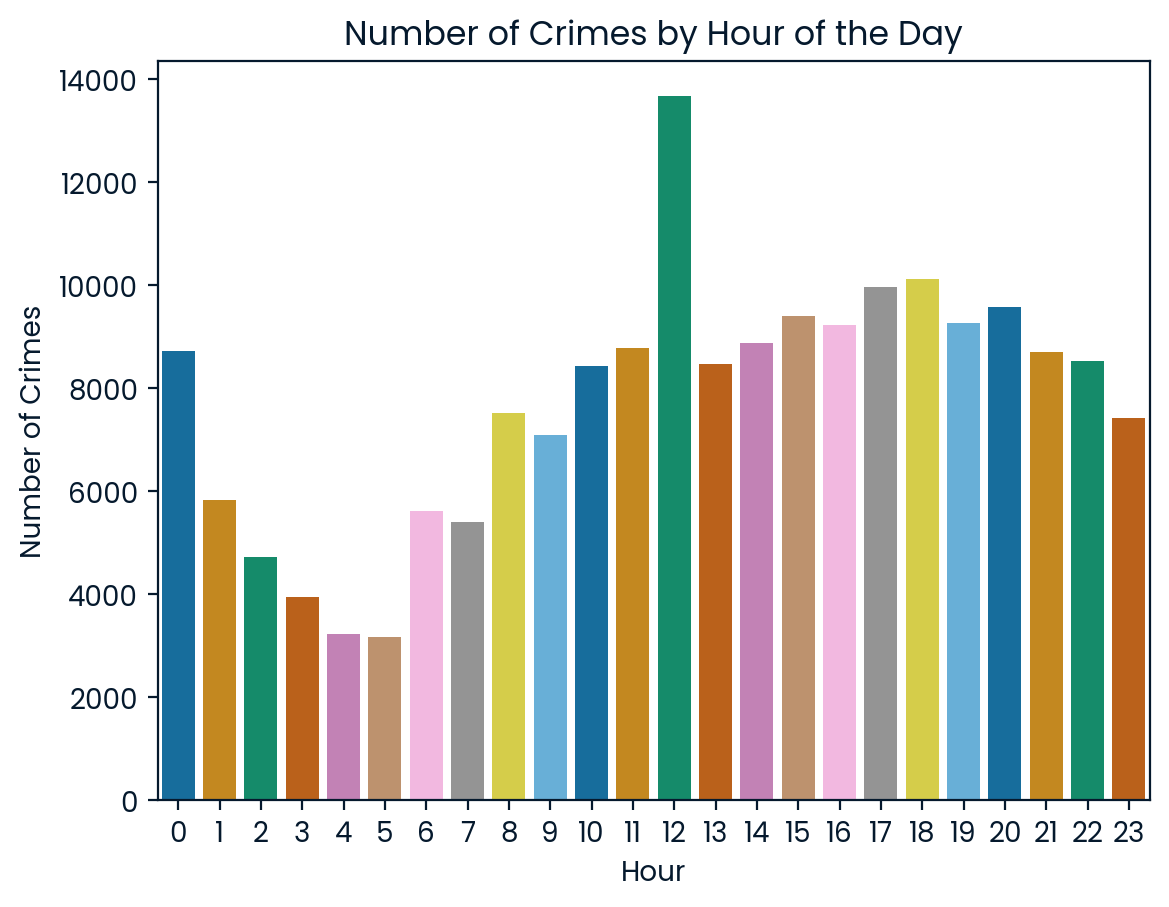

In [54]:
# The time of occurence is in 24-hour military time. There are four digits with the last two digits representing the minutes. Therefore, we need to divide TIME OCC by 100, flooring the result to get rid of the minutes.
# Using value_counts(), the number of crime occurences for each our is tallied. The idxmax() method returns the index of highest count which represents the peak crime hour
crimes['TIME OCC hour'] = crimes['TIME OCC'].astype(int)//100
peak_crime_hour = crimes['TIME OCC hour'].value_counts().idxmax()
print('The hour with the highest frequency of crimes is', str(peak_crime_hour))

g = sns.countplot(x='TIME OCC hour', data=crimes, palette='colorblind')
g.set_title('Number of Crimes by Hour of the Day')
g.set_ylabel('Number of Crimes')
g.set_xlabel('Hour')
plt.show()

# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

The Central area has the largest frequency of night crimes


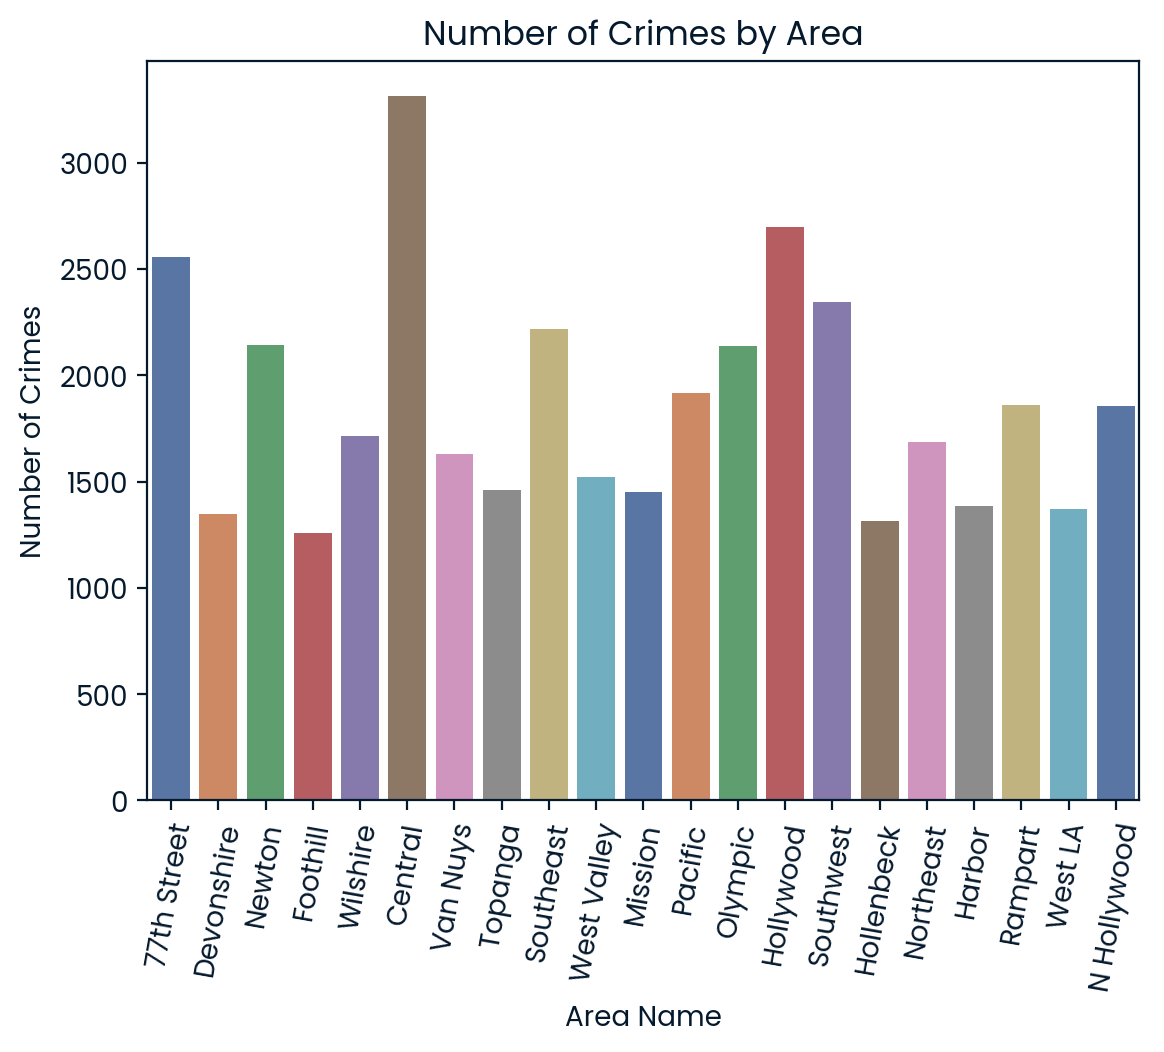

In [55]:
night_filter = (crimes['TIME OCC'].astype(int) >= 2200) | (crimes['TIME OCC'].astype(int)<=359)
night_crimes = crimes[night_filter]
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()
print('The', peak_night_crime_location, 'area has the largest frequency of night crimes')

g2 = sns.countplot(x='AREA NAME', data=night_crimes, palette='deep')
g2.set_title('Number of Crimes by Area')
g2.set_ylabel('Number of Crimes')
g2.set_xlabel('Area Name')
plt.xticks(rotation=80)
plt.show()

# Identify the number of crimes committed against victims of different age groups.

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: victim_ages, dtype: int64


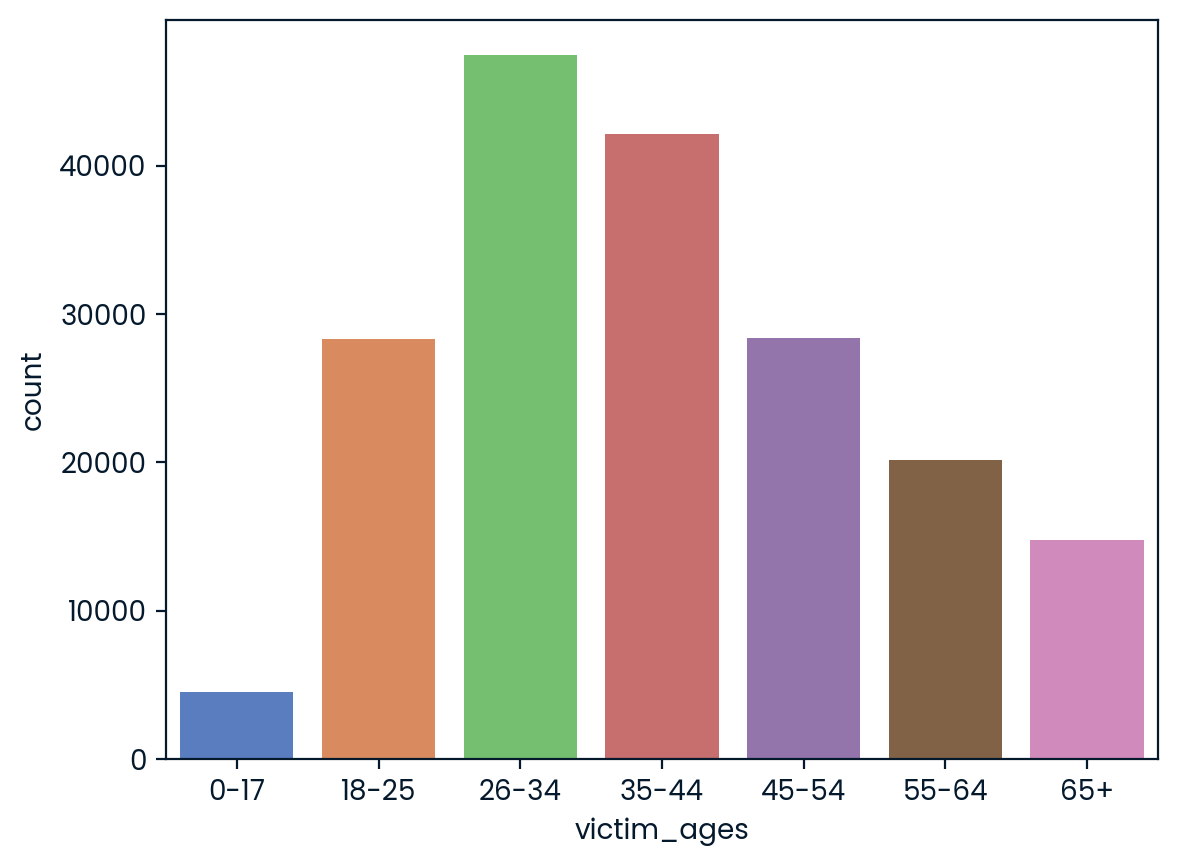

In [56]:
age_labels = ["0-17", "18-25", '26-34', "35-44", "45-54", "55-64", '65+']
bins = [0, 17, 25, 34, 44, 54, 64, crimes['Vict Age'].max()]
crimes['victim_ages'] = pd.cut(crimes['Vict Age'], labels=age_labels, bins=bins)
victim_ages = crimes['victim_ages'].value_counts()
print(victim_ages)


g3 = sns.countplot(x='victim_ages', data=crimes, palette='muted')
plt.show()